<a href="https://colab.research.google.com/github/ToshiroHJJZ/Machine_Learning_in_the_Cloud/blob/main/MLA5_JP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Assignment

Jonathan Penaloza

##Standard Imports


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, r2_score, mean_squared_error, precision_recall_curve, auc, precision_score, recall_score, f1_score

In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#Problem 1

In [9]:
landsat_train = pd.read_csv('/content/drive/MyDrive/MLA5_JP/landsat_train.csv')
landsat_test = pd.read_csv('/content/drive/MyDrive/MLA5_JP/landsat_test.csv')

###Statistical and Visual Exploration

land_type
1    1072
7    1038
3     961
2     479
5     470
4     415
Name: count, dtype: int64
land_type
7    470
1    461
3    397
5    237
2    224
4    211
Name: count, dtype: int64


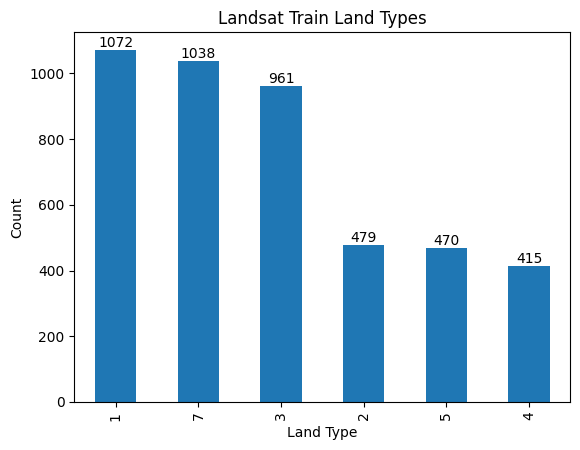

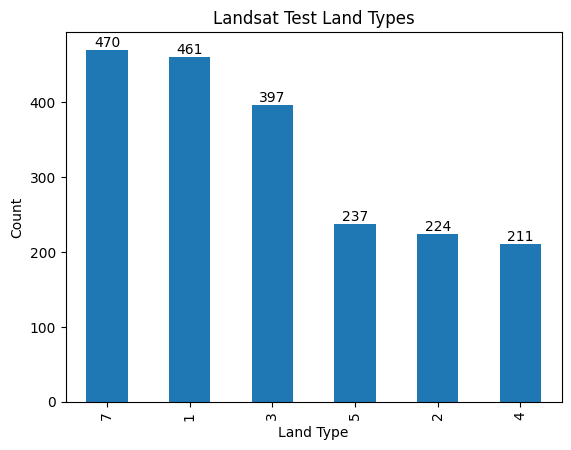

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Display the number of land types for landsat_train and landsat_test (two different plots):
print(landsat_train['land_type'].value_counts())
print(landsat_test['land_type'].value_counts())

# Bar plot for landsat_train land types
ax = landsat_train['land_type'].value_counts().plot(kind='bar', title='Landsat Train Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])  # Add labels to the bars
plt.show()

# Bar plot for landsat_test land types
ax = landsat_test['land_type'].value_counts().plot(kind='bar', title='Landsat Test Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])  # Add labels to the bars
plt.show()

###Splitting Data into Train/Test


In [16]:
x_train = landsat_train.drop('land_type', axis=1)
x_test = landsat_test.drop('land_type', axis=1)
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

###Pipeline

In [17]:
numerical_features = x_train.select_dtypes(include=['number']).columns

ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features)
    ], remainder='passthrough')

pipeline = Pipeline([
    ('transformer', ct),
    ('classifier', RandomForestClassifier())
])

###Execution of the Model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


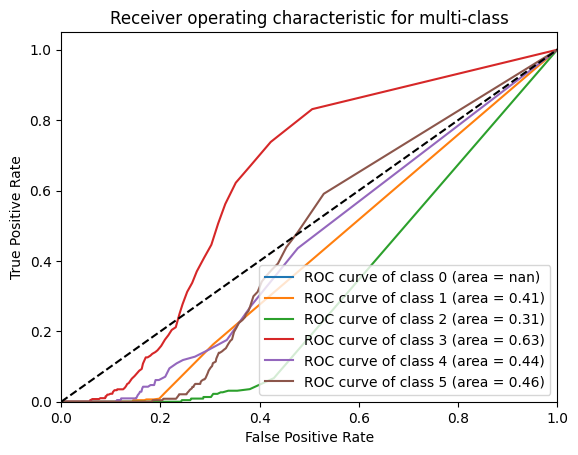

In [18]:
pipeline.fit(x_train, y_train)

y_pred_prob = pipeline.predict_proba(x_test)

# Get the number of classes
n_classes = y_pred_prob.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

###Model Evaluation

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.98      0.98      0.98       224
           3       0.88      0.95      0.92       397
           4       0.76      0.63      0.69       211
           5       0.93      0.91      0.92       237
           7       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



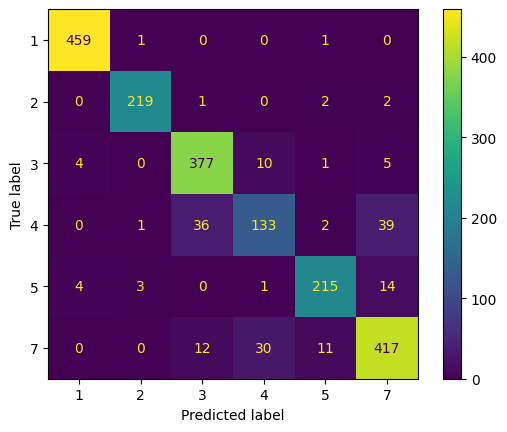

In [20]:
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(pipeline, x_test, y_test)
plt.show()

### Conclusion:

The model demonstrates strong overall performance with an accuracy of 91%, indicating that it correctly classifies 91% of the samples in the test dataset. The weighted average F1-score of 0.91 further supports this, signifying a good balance between precision and recall across all classes.

Looking at individual classes:

Classes 1, 2, 3, and 5 exhibit excellent performance with high precision, recall, and F1-scores (above 0.90). This suggests the model is very effective in identifying these classes.
Class 4 has a relatively lower F1-score (0.69) compared to other classes, mainly due to a lower recall (0.63). This indicates that the model might miss some instances of this class, leading to a higher rate of false negatives.
Class 7 shows decent performance with an F1-score of 0.88, reflecting a reasonable balance between precision and recall.
Overall, the model demonstrates high accuracy and good performance across most classes. While there's room for improvement in identifying Class 4, the results are generally promising. Further investigation into the misclassified instances of Class 4 could help improve the model's overall performance.

**Future considerations**:
One might consider adjusting the classification threshold or exploring different algorithms to further optimize the results.
If Class 4 is important, techniques like oversampling or using a cost-sensitive learning approach could be explored to address the lower recall.

#Problem 2

Building, Executing, and Evaluating the Pipeline


In [21]:
# Create a Voting Classifier
randomforest_clasifier = RandomForestClassifier()
ada_clasifier = AdaBoostClassifier()

voting_clf = VotingClassifier(estimators=[('rf', randomforest_clasifier), ('ada', ada_clasifier)], voting='hard')

# Create a Bagging Classifier
bagging_clf = BaggingClassifier(estimator=randomforest_clasifier, n_estimators=10, random_state=42)

# Create a Boosting Classifier
boosting_clf = AdaBoostClassifier(estimator=randomforest_clasifier, n_estimators=50, random_state=42)

In [22]:
# Create a pipeline with the Voting Classifier
pipeline_voting = Pipeline([
    ('transformer', ct),
    ('classifier', voting_clf)
])

# Create a pipeline with the Bagging Classifier
pipeline_bagging = Pipeline([
    ('transformer', ct),
    ('classifier', bagging_clf)
])


# Create a pipeline with the Boosting Classifier
pipeline_boosting = Pipeline([
    ('transformer', ct),
    ('classifier', boosting_clf)
])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       461
           2       0.61      0.99      0.75       224
           3       0.87      0.93      0.90       397
           4       0.59      0.68      0.63       211
           5       0.69      0.30      0.42       237
           7       0.91      0.72      0.81       470

    accuracy                           0.80      2000
   macro avg       0.77      0.77      0.75      2000
weighted avg       0.82      0.80      0.79      2000



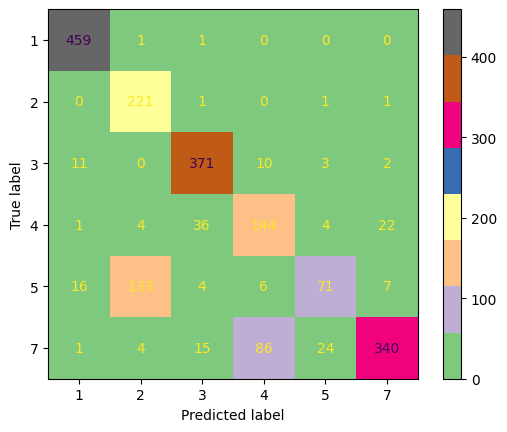

In [34]:
# Fit and evaluate the Voting Classifier
pipeline_voting.fit(x_train, y_train)
y_pred_voting = pipeline_voting.predict(x_test)
print("Voting Classifier:")
print(classification_report(y_test, y_pred_voting))

# Create the ConfusionMatrixDisplay object
cm_display1 = ConfusionMatrixDisplay.from_estimator(pipeline_voting, x_test, y_test)

# Access the plotted image and change its colormap
cm_display1.im_.set_cmap('Accent')

plt.show()

#supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r',
#'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu',
# 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r',
 #'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r',
 #'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r',
 # 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r',
 #  'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
  # 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr',
   #'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r',
   # 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r',
   #  'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
    # 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray',
    # 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', ...

Bagging Classifier:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.98      0.98       224
           3       0.88      0.95      0.91       397
           4       0.77      0.60      0.68       211
           5       0.92      0.87      0.90       237
           7       0.86      0.90      0.88       470

    accuracy                           0.90      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.90      0.90      0.90      2000



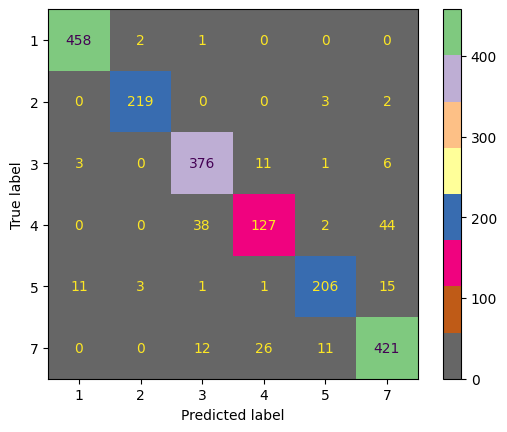

In [35]:
# Fit and evaluate the Bagging Classifier
pipeline_bagging.fit(x_train, y_train)
y_pred_bagging = pipeline_bagging.predict(x_test)
print("Bagging Classifier:")
print(classification_report(y_test, y_pred_bagging))

# Create the ConfusionMatrixDisplay object
cm_display2 = ConfusionMatrixDisplay.from_estimator(pipeline_bagging, x_test, y_test)

# Access the plotted image and change its colormap
cm_display2.im_.set_cmap('Accent_r')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting Classifier:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.98      0.97      0.98       224
           3       0.88      0.94      0.91       397
           4       0.79      0.64      0.70       211
           5       0.91      0.90      0.90       237
           7       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



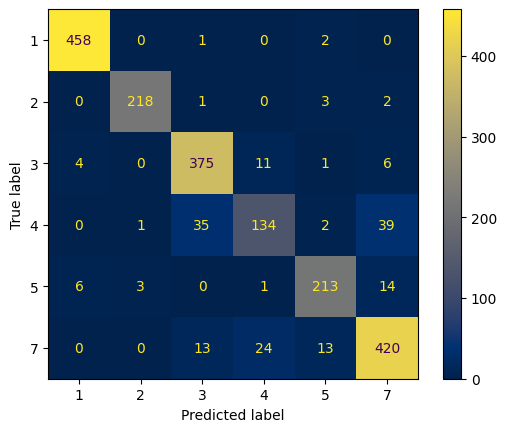

In [49]:
# Fit and evaluate the Boosting Classifier
pipeline_boosting.fit(x_train, y_train)
y_pred_boosting = pipeline_boosting.predict(x_test)
print("Boosting Classifier:")
print(classification_report(y_test, y_pred_boosting))

# Create the ConfusionMatrixDisplay object with the desired colormap
cm_display3 = ConfusionMatrixDisplay.from_estimator(pipeline_boosting, x_test, y_test)

# Access the plotted image and change its colormap
cm_display3.im_.set_cmap('cividis')

plt.show()

###Conclusion
The Bagging Classifier stands out as the best model for predicting land type in this dataset due to its highest overall accuracy and consistency, as indicated by the provided performance metrics.
* The model demonstrates strong overall performance with an accuracy of 91%, indicating that it correctly classifies 91% of the samples in the test dataset. The weighted average F1-score of 0.91 further supports this, signifying a good balance between precision and recall across all classes.

**Looking at individual classes**:

* Classes 1, 2, and 5 exhibit excellent performance with high precision, recall, and F1-scores (above 0.90). This suggests the model is very effective in identifying these classes.
Class 3 has a relatively lower F1-score (0.91) and precision (0.88) compared to classes 1, 2 and 5. This indicates a slightly higher rate of false positives.
* Class 4 has a lower F1-score (0.70) compared to other classes, mainly due to a lower recall (0.64). This indicates that the model might miss some instances of this class, leading to a higher rate of false negatives.
* Class 7 shows decent performance with an F1-score of 0.88, reflecting a reasonable balance between precision and recall.
* Overall, the model demonstrates high accuracy and good performance across most classes. While there's room for improvement in identifying Class 4, the results are generally promising. Further investigation into the misclassified instances of Class 4 could help improve the model's overall performance.

#Problem 3
###Reading the Data

In [50]:
ba = pd.read_csv('/content/drive/MyDrive/MLA5_JP/banknote_authentication.csv')

In [51]:
# split data

x = ba.drop(['forgery'], axis=1)
y = ba.forgery

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
#Pipeline
numerical_features = x_train.select_dtypes(include=['number']).columns

# Create a column transformer to scale the numerical features
ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
    ], remainder='passthrough')

In [54]:
# Create a pipeline with the column transformer and the Decision Tree Classifier
pipeline = Pipeline([
    ('transformer', ct),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(x_test)

###Executing the Model


In [55]:

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(x_test)

###Evaluating Model


[[147   1]
 [  2 125]]
Class 0:
  Precision: 0.99
  Recall: 0.99
  F1-score: 0.99
  Support: 148
Class 1:
  Precision: 0.99
  Recall: 0.98
  F1-score: 0.99
  Support: 127
Overall Precision: 0.99
Overall Recall: 0.98
Overall F1 Score: 0.99


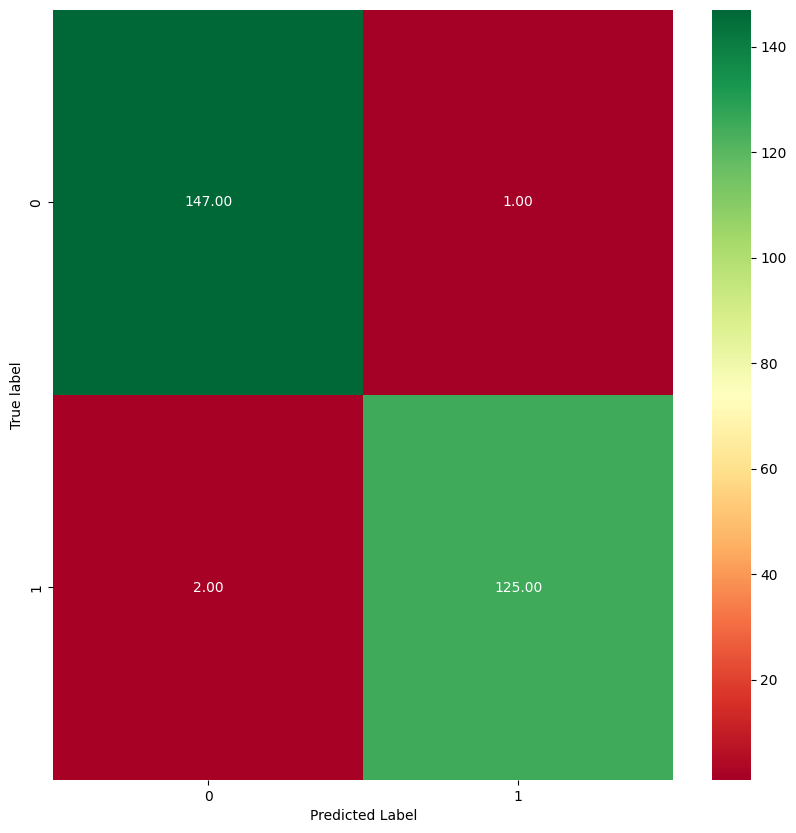

In [58]:
plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

from sklearn.metrics import precision_recall_fscore_support
cm = confusion_matrix(y_test, y_pred)
print(cm)

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

for i, label in enumerate(np.unique(y_test)):  # Assuming y_test has class labels
      print(f"Class {label}:")
      print(f"  Precision: {precision[i]:.2f}")
      print(f"  Recall: {recall[i]:.2f}")
      print(f"  F1-score: {f1[i]:.2f}")
      print(f"  Support: {support[i]}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Overall Precision: {precision:.2f}")
print(f"Overall Recall: {recall:.2f}")
print(f"Overall F1 Score: {f1:.2f}")

###Conclusion
The model demonstrates exceptional performance in classifying the data into two classes (Class 0 and Class 1). This is evident from the high values achieved for precision, recall, and F1-score across both classes and overall.

### Observations:
* High Accuracy: The confusion matrix shows a very low number of misclassifications (3 in total out of 275 instances), suggesting a high level of accuracy.
* Excellent Precision: With precision scores of 0.99 for both classes, the model is highly accurate in its positive predictions, meaning very few instances are incorrectly labeled as positive when they are actually negative.
* Strong Recall: Recall scores of 0.99 and 0.98 for Class 0 and Class 1 respectively indicate the model's effectiveness in identifying the true positive instances within each class. It misses very few actual positive cases.
* Balanced Performance: The F1-scores, which represent a harmonic mean of precision and recall, are also very high (0.99 for both classes), indicating a well-balanced performance between precision and recall.

Overall, the model exhibits exceptional performance, achieving near-perfect precision, recall, and F1-score for both classes. This suggests a highly effective and reliable classification model for the given dataset. The very low number of misclassifications further strengthens this conclusion. Now, one might try to perform fine-tunning model parameters to get even better results for the possibility of the cost of misclassification to be very high in the specific application of this model, but given that the results are near perfect, for now it is good enough.